### Midterm Project

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics


%matplotlib inline

In [2]:
df= pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
column_types = df.dtypes

In [6]:
column_types

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
column_names = df.columns

In [8]:
column_names

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# STAGE 01

## Data cleaning

### 👉 Cheking Age

### Changing the data type of "Age"

In [9]:
df['age'] = df['age'].astype("int64")

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


In [11]:
df.drop(df[(df["age"].isin([0,1,2,3]))].index,inplace=True)

### 👉 Cheking Gender

In [12]:
df["gender"].value_counts()

gender
Female    56468
Male      39189
Other        18
Name: count, dtype: int64

In [13]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

### Let's replace "other" to "female"!

In [14]:
df['gender'].replace(['Other'], ["Female"], inplace=True)

In [15]:
df["gender"].value_counts()

gender
Female    56486
Male      39189
Name: count, dtype: int64

### 👉 Cheking Hypertension

In [16]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

### 👉 Cheking heart_disease

In [17]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

### 👉 Cheking Smoking_History

In [18]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [19]:
df["smoking_history"].value_counts()

smoking_history
never          34682
No Info        31964
former          9352
current         9272
not current     6402
ever            4003
Name: count, dtype: int64

### Dropping the "No info" rows 

In [20]:
df.drop(df[(df["smoking_history"]=="No Info")].index,inplace=True)

In [21]:
df["smoking_history"].value_counts()

smoking_history
never          34682
former          9352
current         9272
not current     6402
ever            4003
Name: count, dtype: int64

### Merge "ever" with "never" and "not current" with "former"

In [22]:
df["smoking_history"] = df["smoking_history"].replace({"ever":"never","not current":"former"})

In [23]:
df["smoking_history"].value_counts()

smoking_history
never      38685
former     15754
current     9272
Name: count, dtype: int64

### 👉 Cheking BM! 

In [24]:
df["bmi"].unique()

array([25.19, 27.32, 23.45, ..., 49.25, 59.42, 60.52])

In [25]:
df["bmi"].value_counts()

bmi
27.32    11964
25.60       83
25.00       82
23.00       79
24.60       77
         ...  
47.59        1
41.54        1
13.12        1
15.15        1
60.52        1
Name: count, Length: 3927, dtype: int64

### 👉 Checking HbA1c_level

In [26]:
df["HbA1c_level"].value_counts()

HbA1c_level
6.2    5393
6.6    5390
5.7    5340
6.0    5289
6.5    5259
5.8    5245
6.1    5124
3.5    4794
4.8    4707
4.5    4686
4.0    4641
5.0    4633
9.0     548
8.8     546
8.2     541
7.5     534
6.8     528
7.0     513
Name: count, dtype: int64

### 👉 Checking Blood_glucose_level

In [27]:
df["blood_glucose_level"].value_counts()

blood_glucose_level
140    4993
160    4962
130    4928
159    4927
155    4885
145    4841
126    4841
200    4835
158    4430
80     4405
100    4389
90     4351
85     4233
280     599
300     547
260     526
240     518
220     501
Name: count, dtype: int64

# STAGE 02

In [28]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [29]:
numerical_df = numerical_df.reset_index(drop=True) 

In [30]:
numerical_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,28,0,0,27.32,5.7,158,0
2,36,0,0,23.45,5.0,155,0
3,76,1,1,20.14,4.8,155,0
4,20,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...
63706,26,0,0,34.34,6.5,160,0
63707,40,0,0,40.69,3.5,155,0
63708,66,0,0,27.83,5.7,155,0
63709,24,0,0,35.42,4.0,100,0


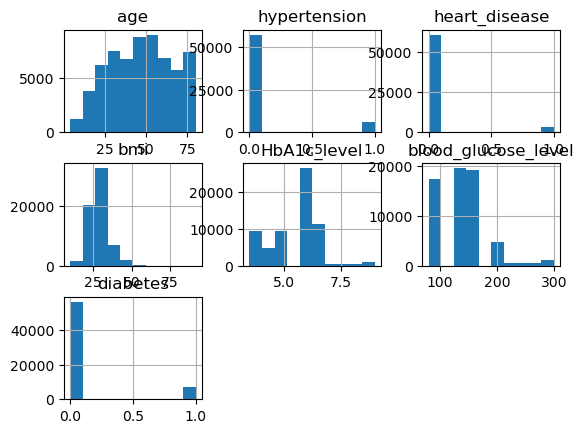

In [31]:
numerical_df.hist()
plt.show()

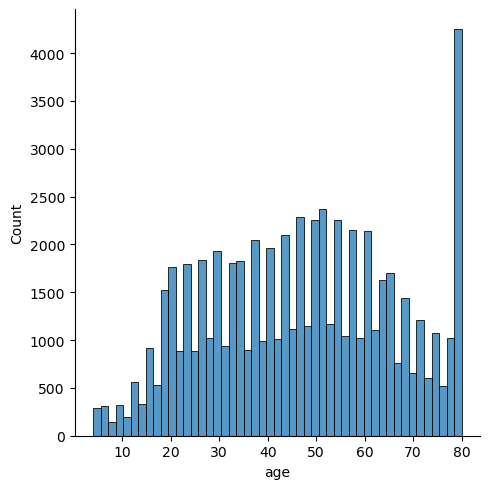

In [32]:
sns.displot(df.age)

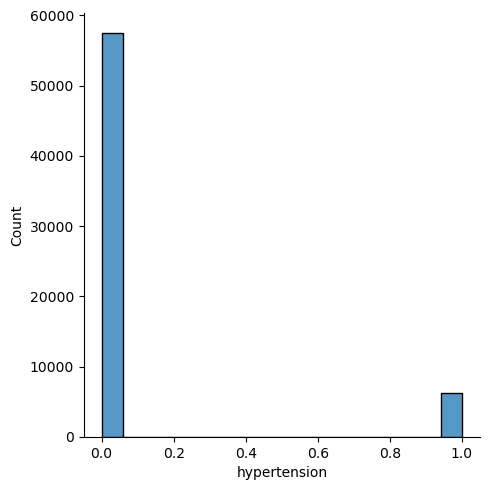

In [33]:
sns.displot(df.hypertension)

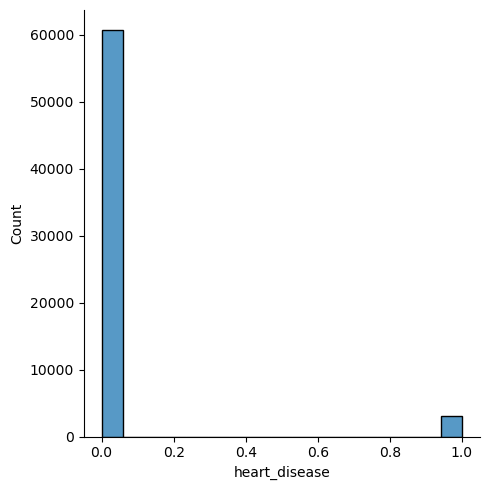

In [34]:
sns.displot(df.heart_disease)

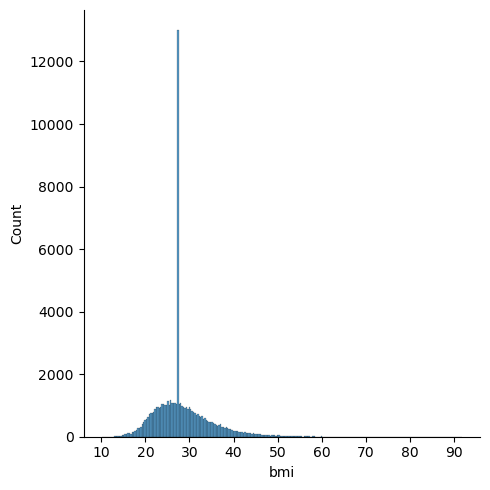

In [35]:
sns.displot(df.bmi)

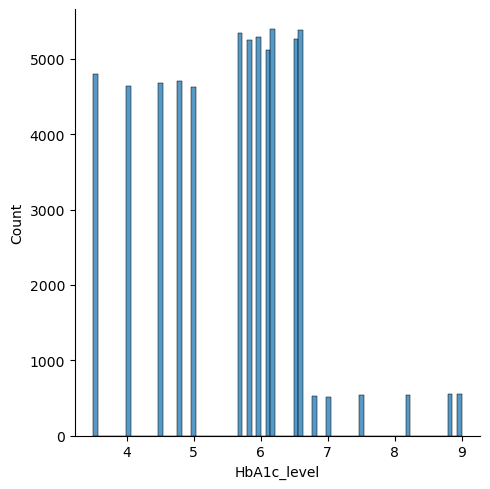

In [36]:
sns.displot(df.HbA1c_level)

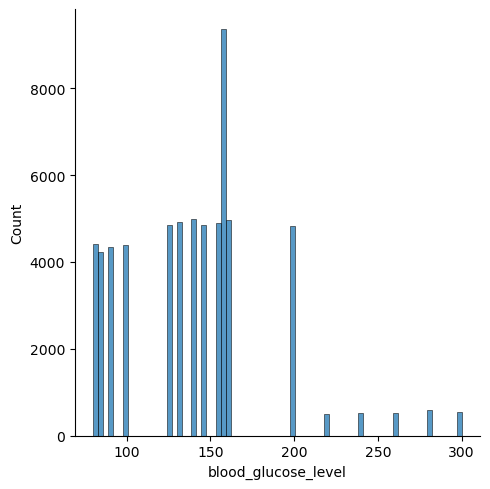

In [37]:
sns.displot(df.blood_glucose_level)

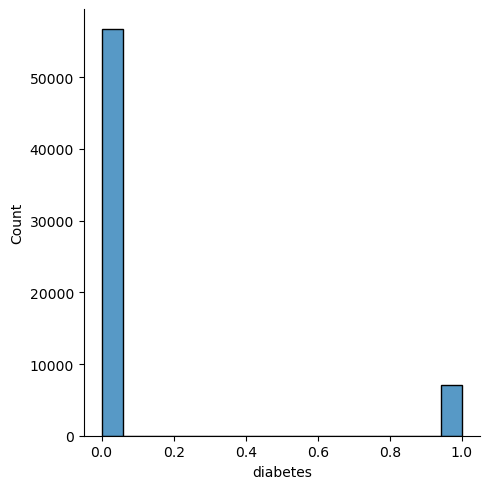

In [38]:
sns.displot(df.diabetes)

## To be able to get the correlation of our variable we are goint to plot the Hitmap

### But firts we need to drop the "hypertension" and "heart_disease" columns

In [39]:
#corr= numerical_df.iloc[:,3:6].corr()
#corr

In [40]:
corr= numerical_df.loc[:,['age','bmi', 'HbA1c_level',"blood_glucose_level"]] .corr()


In [41]:
corr

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.141985,0.115796,0.117020
bmi,0.141985,1.000000,0.084350,0.094415
HbA1c_level,0.115796,0.084350,1.000000,0.195586
blood_glucose_level,0.117020,0.094415,0.195586,1.000000


<Axes: >

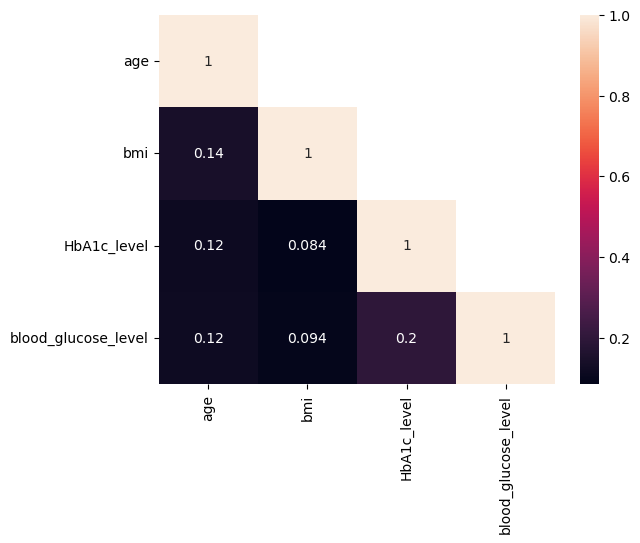

In [42]:
#fig=plt.figure(figsize=(8,5))
#sns.heatmap(corr.corr(),annot=True)

matrix = np.triu(corr)
np.fill_diagonal(matrix,False)
sns.heatmap(corr, annot=True, mask=matrix)

### Conclusion:
We dont need to drop variable because we dont find a hight correlation.

# STAGE 3

# Transforming our categorical variables into numerical variables

In [43]:
categorical_df.columns

Index(['gender', 'smoking_history'], dtype='object')

### Our variables "gender" and "smoking history" are Nominal ( not Hierarque)

We can use dummys to do the transformation.

In [44]:

# Create dummy variables for the 'Color' and 'Size' columns
dummy_nominals = ['gender', 'smoking_history']
categorical_df = pd.get_dummies(categorical_df, columns=dummy_nominals, dtype="int64")



In [45]:
categorical_df = categorical_df.reset_index(drop=True) 

In [46]:
categorical_df

,gender_Female,gender_Male,smoking_history_current,smoking_history_former,smoking_history_never
0,1,0,0,0,1
1,0,1,0,0,1
2,1,0,1,0,0
3,0,1,1,0,0
4,1,0,0,0,1
...,...,...,...,...,...
63706,1,0,0,0,1
63707,1,0,0,0,1
63708,0,1,0,1,0
63709,1,0,0,0,1


In [47]:
numerical_df = numerical_df.reset_index(drop=True) 
numerical_df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [48]:
numerical_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,28,0,0,27.32,5.7,158,0
2,36,0,0,23.45,5.0,155,0
3,76,1,1,20.14,4.8,155,0
4,20,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...
63706,26,0,0,34.34,6.5,160,0
63707,40,0,0,40.69,3.5,155,0
63708,66,0,0,27.83,5.7,155,0
63709,24,0,0,35.42,4.0,100,0


## We concatenate our data

In [49]:
df_transformed = pd.concat([numerical_df, categorical_df], axis=1)

In [50]:
df_transformed 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_former,smoking_history_never
0,80,0,1,25.19,6.6,140,0,1,0,0,0,1
1,28,0,0,27.32,5.7,158,0,0,1,0,0,1
2,36,0,0,23.45,5.0,155,0,1,0,1,0,0
3,76,1,1,20.14,4.8,155,0,0,1,1,0,0
4,20,0,0,27.32,6.6,85,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63706,26,0,0,34.34,6.5,160,0,1,0,0,0,1
63707,40,0,0,40.69,3.5,155,0,1,0,0,0,1
63708,66,0,0,27.83,5.7,155,0,0,1,0,1,0
63709,24,0,0,35.42,4.0,100,0,1,0,0,0,1


## STAGE 05: Splitting the data into test and train

In [51]:
df_transformed.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_former',
       'smoking_history_never'],
      dtype='object')

In [52]:
X=df_transformed[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male','smoking_history_current',
       'smoking_history_former', 'smoking_history_never']]
y=df_transformed['diabetes']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# ⏸️

## ⚠️ Let's check what happend with our linear regression before get a balance in our data

1.Tranform our scales using min and max

2.To apply the logisti regression

3.Getting the predictions

4.Cheking our currency

5.Classification Report

6.Confussion Matriz

In [107]:
#1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaler_train= scaler.transform(X_train)

X_scaler_test= scaler.transform(X_test)

#2

model_unbalenced = LogisticRegression()
model_unbalenced.fit(X_scaler_train, y_train)

#3

y_predictive = model_unbalenced.predict(X_scaler_test)

#4

accuracy = accuracy_score(y_test, y_predictive)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 95.00%


In [108]:
# 5 Classification Report
rep = classification_report(y_test,y_predictive)
print(rep)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17035
           1       0.87      0.64      0.74      2079

    accuracy                           0.95     19114
   macro avg       0.91      0.81      0.85     19114
weighted avg       0.95      0.95      0.95     19114



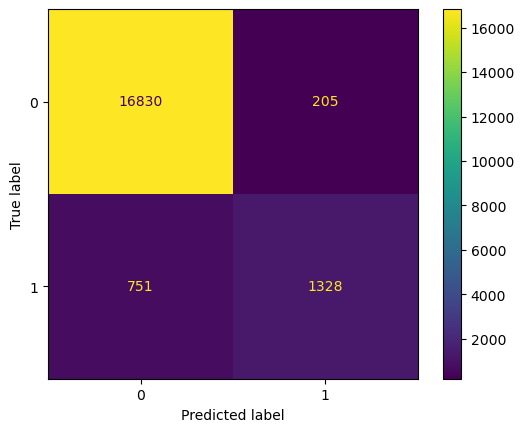

In [109]:
# 6 Confussion Matrix

cm = confusion_matrix(y_test, y_predictive, labels=model_unbalenced.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_unbalenced.classes_)
disp.plot()
plt.show()

###  Receiver operating characteristic (ROC)

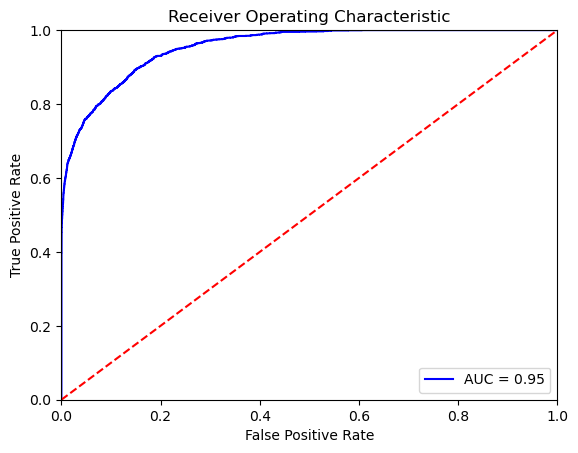

In [111]:

probs01 = model_unbalenced.predict_proba(X_scaler_test)

preds01 = probs01[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_test, preds01)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ▶️

##  ✅ STAGE 06: Transforming the scale

In this case we are going to use Min and Max transformed

⚠️-NOTE:

Using SMOTE to balance our data, that calculates new synthetic data points using k-neighbors, the data needs to be scaled before balancing, because knn works using distances and if our variables are on different scales it will impact the results.


**In this case we are using Min and Max tranformer scaler (NORMALIZATION)**


⚠️-NOTE:

We JUST NEED TO apply normalization for our **independent Variables!!** 

In this case how we split our independen Variable "X" into X_train and X_test, we must scaled both variables!

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaler_train= scaler.transform(X_train)
X_scaler_test= scaler.transform(X_test)

### Other way tranforming our data using Scaler

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
#df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#print(df_scaled.head)
#df_scaled.hist()
#plt.show()

## ✅ STAGE 06: Handle Imbalanced data


**Our new scaled Variables👀**

X_scaler_train

X_scaler_test

**Variables used for balenced data**

X_scaler_train

y_train

### 👉 Method N.01: Undersampling

Near Miss version 3 

In [112]:
import pandas as pd
from imblearn.under_sampling import NearMiss

In [116]:
undersampling = NearMiss(version=3, n_neighbors_ver3=3)

#X_resampled, y_resampled_train = undersampling.fit_resample(X_train, y_train)

X_undersampling_train, y_undersampling_train = undersampling.fit_resample(X_scaler_train, y_train)


In [117]:
model_undersampling = LogisticRegression()
model_undersampling .fit(X_undersampling_train,y_undersampling_train)

LogisticRegression()

In [118]:
#3

y_predictive_using_undersampling = model_undersampling.predict(X_scaler_test)

#4

accuracy = accuracy_score(y_test, y_predictive_using_undersampling)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 94.53%


In [119]:
rep = classification_report(y_test,y_predictive_using_undersampling)
print(rep)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17035
           1       0.79      0.68      0.73      2079

    accuracy                           0.95     19114
   macro avg       0.87      0.83      0.85     19114
weighted avg       0.94      0.95      0.94     19114



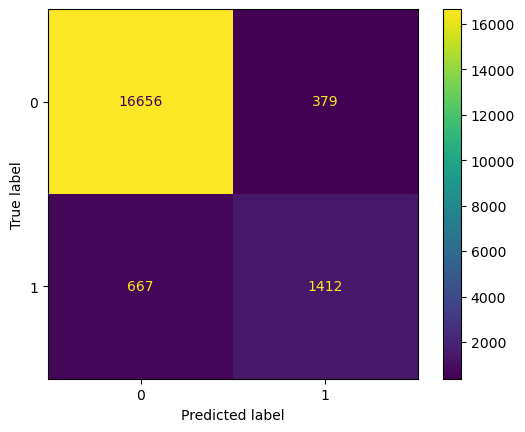

In [120]:
cm = confusion_matrix(y_test, y_predictive_using_undersampling, labels=model_undersampling .classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_undersampling .classes_)
disp.plot()
plt.show()

###  Receiver operating characteristic (ROC)

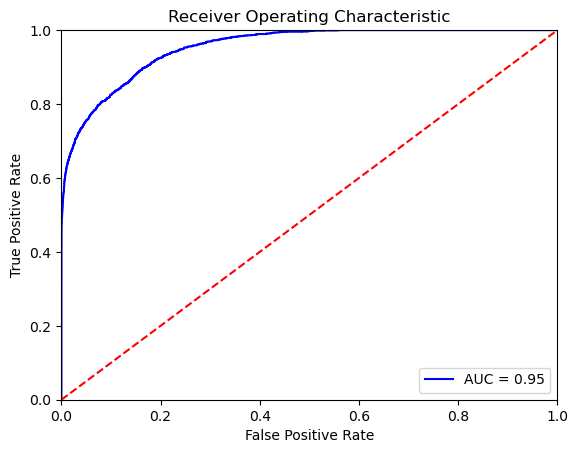

In [121]:
probs02 = model_undersampling.predict_proba(X_scaler_test)

preds02 = probs02[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_test, preds02)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 👉 Method N.02: Class Weight

In [122]:
from sklearn.linear_model import LogisticRegression

# Define the class weights
class_weights = {
    0: 1,  # weight for class 0 (majority class)
    1: 5   # weight for class 1 (minority class)
}

# Create the logistic regression model with class weights
model_class_weight = LogisticRegression(class_weight=class_weights)

# Fit the model to the training data
model_class_weight.fit(X_scaler_train, y_train)


LogisticRegression(class_weight={0: 1, 1: 5})

In [123]:
y_predictive_weight_class = model_class_weight.predict(X_scaler_test)

accuracy = accuracy_score(y_test, y_predictive_weight_class )

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 90.92%


In [124]:
rep = classification_report(y_test,y_predictive_weight_class)
print(rep)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     17035
           1       0.56      0.80      0.66      2079

    accuracy                           0.91     19114
   macro avg       0.77      0.86      0.80     19114
weighted avg       0.93      0.91      0.92     19114



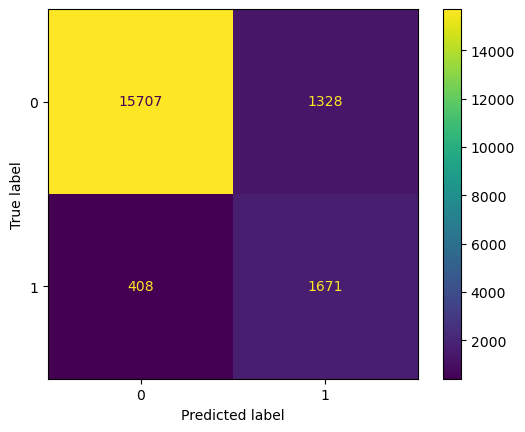

In [127]:
cm = confusion_matrix(y_test, y_predictive_weight_class, labels=model_class_weight.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_class_weight.classes_)
disp.plot()
plt.show()

###  Receiver operating characteristic (ROC)

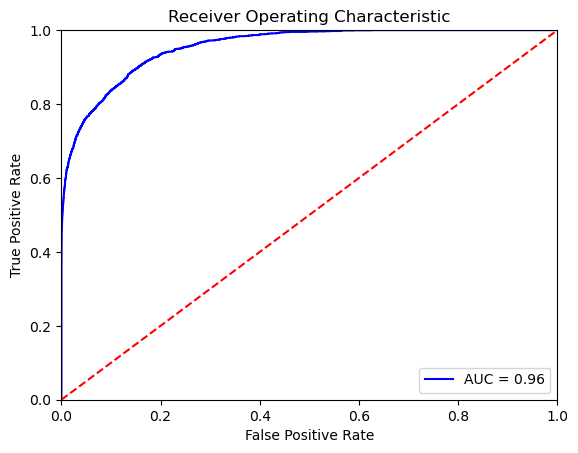

In [135]:
probs03 = model_class_weight.predict_proba(X_scaler_test)

preds03 = probs03[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_test, preds03)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 👉 Method N.03: Synthetic Minority Over-sampling Technique (SMOTE)

In [57]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE oversampling object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_smote_train, y_smote_train = smote.fit_resample(X_scaler_train, y_train)


### Let's check the performance of our model using SMOTE to balance our data

In [58]:
#2

model_smote = LogisticRegression()
model_smote.fit(X_smote_train, y_smote_train)


LogisticRegression()

In [59]:
#3

y_predictive_using_smote = model_smote.predict(X_scaler_test)



In [60]:
#4

accuracy = accuracy_score(y_test, y_predictive_using_smote)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 88.27%


In [61]:
y_test

39833    0
21475    0
12024    0
29818    0
59762    1
        ..
33753    0
7301     0
45757    0
9224     0
6341     1
Name: diabetes, Length: 19114, dtype: int64

In [62]:
y_predictive_using_smote

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [63]:
residuals= pd.DataFrame({"y-pred":y_predictive_using_smote,"y-test":y_test})


In [64]:
residuals.reset_index(drop=True,inplace=True)

In [65]:
residuals.to_csv("confusion_matrix.csv",index=False)

In [66]:
rep = classification_report(y_test,y_predictive_using_smote)
print(rep)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     17035
           1       0.48      0.85      0.61      2079

    accuracy                           0.88     19114
   macro avg       0.73      0.87      0.77     19114
weighted avg       0.92      0.88      0.90     19114



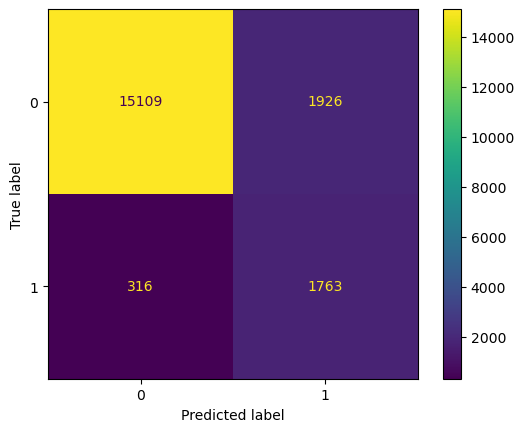

In [67]:
cm = confusion_matrix(y_test, y_predictive_using_smote, labels=model_smote.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_smote.classes_)
disp.plot()
plt.show()

###  Receiver operating characteristic (ROC)

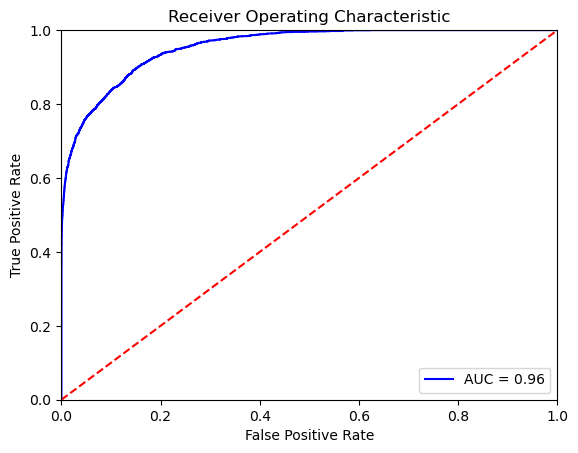

In [68]:
probs03 = model_smote.predict_proba(X_scaler_test)

preds03 = probs03[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_test, preds03)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
coefficients = model_smote.coef_

In [70]:
coefficients

array([[ 3.81859408,  0.82206972,  0.65772374,  8.39239292, 12.07468905,
         6.97586165, -0.17722179,  0.178376  ,  0.07296896, -0.02505415,
        -0.0467606 ]])

In [71]:
a={"independent variables" : ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male','smoking_history_current',
       'smoking_history_former', 'smoking_history_never'],
   'coefficients':[3.81859411,  0.82206973,  0.65772377,  8.39239272, 12.07468894,
         6.97586151, -0.17722187,  0.17837591,  0.07296889, -0.02505421,
        -0.04676064]}

In [72]:
coefficients_analysis = pd.DataFrame(a)

In [73]:
coefficients_analysis

,independent variables,coefficients
0,age,3.818594
1,hypertension,0.822070
2,heart_disease,0.657724
3,bmi,8.392393
4,HbA1c_level,12.074689
5,blood_glucose_level,6.975862
6,gender_Female,-0.177222
7,gender_Male,0.178376
8,smoking_history_current,0.072969
9,smoking_history_former,-0.025054


In [74]:
coefficients_analysis.to_csv("coef.csv",index=False)

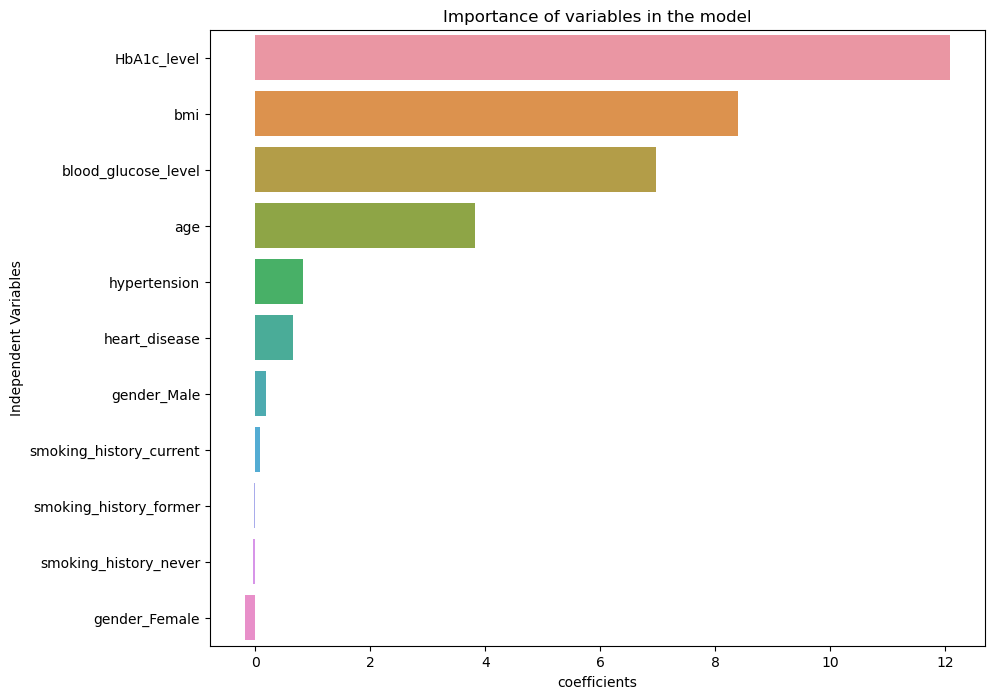

In [75]:


# Crear un DataFrame con las variables y sus importancias
#df_orden_importances = pd.new_1({'variables': names, 'Importance': coef})

# Ordenar el DataFrame por importancia descendente
df_orden_importances = coefficients_analysis.sort_values(by='coefficients', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='coefficients', y='independent variables', data=df_orden_importances)
plt.xlabel('coefficients')
plt.ylabel('Independent Variables')
plt.title('Importance of variables in the model')

# Mostrar el gráfico
plt.show()

# Example

In [118]:
age = int(input("Enter age: "))
hypertension = int(input("Enter hypertension (1 for yes, 0 for no): "))
heart_disease = int(input("Enter heart disease (1 for yes, 0 for no): "))
bmi = int(input("Enter BMI: "))
HbA1c_level = int(input("Enter HbA1c level: "))
blood_glucose_level = int(input("Enter blood glucose level: "))
gender_Female = int(input("Enter gender (1 for female, 0 for male): "))

if gender_Female == 1:
    gender_Male = 0
else:
    gender_Male = 1

    
smoking_history_current = int(input("Enter smoking history (1 for current smoker, 0 for not): "))

if smoking_history_current == 1:
    smoking_history_former = 0
    smoking_history_never = 0
    
else:
    smoking_history_former = int(input("Enter smoking history (1 for former smoker, 0 for not): "))
    
    if smoking_history_former == 1:
        smoking_history_never = 0
    else:
        smoking_history_never = 1

X_example = pd.DataFrame({"age":age,"hypertension":hypertension,"heart_disease":heart_disease,"bmi":bmi,
                          "HbA1c_level":HbA1c_level,"blood_glucose_level":blood_glucose_level,
                          "gender_Female":gender_Female,"gender_Male":gender_Male,
                          "smoking_history_current":smoking_history_current,
                          "smoking_history_former":smoking_history_former,
                          "smoking_history_never":smoking_history_never}, index=[0])




X_example = scaler.transform(X_example)
y_example = model_smote.predict(X_example)

print("Diabetes Result:", int(y_example))

Enter age: 70
Enter hypertension (1 for yes, 0 for no): 1
Enter heart disease (1 for yes, 0 for no): 1
Enter BMI: 30
Enter HbA1c level: 120
Enter blood glucose level: 120
Enter gender (1 for female, 0 for male): 0
Enter smoking history (1 for current smoker, 0 for not): 0
Enter smoking history (1 for former smoker, 0 for not): 1
Diabetes Result: 1
